# CNN 신경망 만들기

### 데이터 가져오기

In [ ]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### 차원 추가 & 이미지 정규화

Conv2D layer → 컬러 이미지를 위해 설계되었기 때문에 흑백 이미지의 경우 세 번째 차원을 1로 지정해야 한다.

In [ ]:
# 정규화하기 전에 차원 추가
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

### 신경망 정의

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Loss function & Optimizer

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train

In [ ]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 15s 4ms/step - loss: 0.4386 - accuracy: 0.8428
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2952 - accuracy: 0.8919
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2464 - accuracy: 0.9084
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2150 - accuracy: 0.9197
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1896 - accuracy: 0.9287
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1642 - accuracy: 0.9378
Epoch 7/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1465 - accuracy: 0.9454
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1267 - accuracy: 0.9520
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1121 - accuracy: 0.9578
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.09

### Evaluate

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.9467 - accuracy: 0.9099


[0.946715235710144, 0.9099000096321106]

### Predict

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[2.9998656e-31 2.0087692e-28 7.7185806e-34 5.5606285e-27 0.0000000e+00
 1.4699404e-18 2.5651654e-25 1.9090073e-23 0.0000000e+00 1.0000000e+00]
9


### 모델 분석하기

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# 말과 사람을 구별하는 CNN

### 데이터 가져오기

https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset?resource=download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
offset_dir = '/content/drive/MyDrive/Colab Notebooks/ML_DL/'
training_dir = offset_dir + 'horse-or-human/train/'

### ImageDataGenerator

Fashion MNIST dataset은 label을 함께 제공했으나, 이미지 기반 dataset 상당수는 레이블 대신 폴더별로 나뉘어져 있다.  

keras의 ImageDataGenerator를 사용하면 이런 디렉터리 구조를 사용해 자동으로 이미지에 레이블을 할당할 수 있다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전체 이미지를 1./255로 스케일 조정하는 ImageDataGenerator 객체 생성
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)   # 이미지 종류가 2개 이상인 경우, class_mode='categorical'

Found 1027 images belonging to 2 classes.


### 신경망 정의

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

### Loss function & Optimizer

binary_crossentropy : 클래스가 두 개인 경우 사용하는 loss function

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

### Train

In [ ]:
model.fit(train_generator, epochs=10)

Epoch 1/10
33/33 [==============================] - 114s 3s/step - loss: 0.6379 - accuracy: 0.6514
Epoch 2/10
33/33 [==============================] - 8s 251ms/step - loss: 0.3124 - accuracy: 0.8783
Epoch 3/10
33/33 [==============================] - 8s 253ms/step - loss: 0.1345 - accuracy: 0.9503
Epoch 4/10
33/33 [==============================] - 9s 262ms/step - loss: 0.0575 - accuracy: 0.9805
Epoch 5/10
33/33 [==============================] - 12s 351ms/step - loss: 0.2472 - accuracy: 0.9825
Epoch 6/10
33/33 [==============================] - 9s 257ms/step - loss: 0.0123 - accuracy: 0.9971
Epoch 7/10
33/33 [==============================] - 8s 254ms/step - loss: 0.2034 - accuracy: 0.9844
Epoch 8/10
33/33 [==============================] - 8s 255ms/step - loss: 0.0336 - accuracy: 0.9864
Epoch 9/10
33/33 [==============================] - 9s 272ms/step - loss: 8.5715e-04 - accuracy: 1.0000
Epoch 10/10
33/33 [==============================] - 8s 255ms/step - loss: 1.0135e-04 - accuracy

# image_dataset_from_directory 사용하기

ImageDataGenerator 대신 tf.data.Datasets 객체를 반환하는 함수

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

Found 1027 files belonging to 2 classes.


### 신경망 정의

신경망 정의 단계에서 Rescaling layer가 추가됨

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

### Train

In [ ]:
model.fit(train_ds, epochs=10)

Epoch 1/10
33/33 [==============================] - 7s 146ms/step - loss: 0.7230 - accuracy: 0.6777
Epoch 2/10
33/33 [==============================] - 6s 145ms/step - loss: 0.2303 - accuracy: 0.9153
Epoch 3/10
33/33 [==============================] - 6s 144ms/step - loss: 0.2036 - accuracy: 0.9231
Epoch 4/10
33/33 [==============================] - 6s 142ms/step - loss: 0.1231 - accuracy: 0.9611
Epoch 5/10
33/33 [==============================] - 7s 157ms/step - loss: 0.0888 - accuracy: 0.9688
Epoch 6/10
33/33 [==============================] - 6s 143ms/step - loss: 0.1776 - accuracy: 0.9669
Epoch 7/10
33/33 [==============================] - 6s 140ms/step - loss: 0.0100 - accuracy: 0.9961
Epoch 8/10
33/33 [==============================] - 6s 140ms/step - loss: 0.0862 - accuracy: 0.9796
Epoch 9/10
33/33 [==============================] - 6s 141ms/step - loss: 1.9447e-04 - accuracy: 1.0000
Epoch 10/10
33/33 [==============================] - 6s 140ms/step - loss: 0.1498 - accuracy: 0.

# Validation

### 신경망 정의

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

ImageDataGenerator로 디렉터리 구조를 사용해 자동으로 이미지에 레이블을 할당

In [ ]:
validation_dir = offset_dir + 'horse-or-human/validation/'

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


### Train

In [ ]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
33/33 [==============================] - 39s 1s/step - loss: 0.8787 - accuracy: 0.6261 - val_loss: 0.4865 - val_accuracy: 0.7617
Epoch 2/10
33/33 [==============================] - 10s 295ms/step - loss: 0.4536 - accuracy: 0.8530 - val_loss: 2.7340 - val_accuracy: 0.7617
Epoch 3/10
33/33 [==============================] - 10s 297ms/step - loss: 0.2700 - accuracy: 0.9192 - val_loss: 0.4220 - val_accuracy: 0.8711
Epoch 4/10
33/33 [==============================] - 11s 323ms/step - loss: 0.1302 - accuracy: 0.9591 - val_loss: 1.3346 - val_accuracy: 0.8711
Epoch 5/10
33/33 [==============================] - 10s 294ms/step - loss: 0.6868 - accuracy: 0.9211 - val_loss: 0.6780 - val_accuracy: 0.8789
Epoch 6/10
33/33 [==============================] - 10s 299ms/step - loss: 0.0776 - accuracy: 0.9757 - val_loss: 0.7880 - val_accuracy: 0.8984
Epoch 7/10
33/33 [==============================] - 10s 293ms/step - loss: 0.6714 - accuracy: 0.9572 - val_loss: 1.1883 - val_accuracy: 0.7695
Ep

# 모델 실행하기

In [ ]:
import sys

# 코랩을 사용중인지 확인합니다.
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = [offset_dir + 'horse-or-human' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'hh_image_{}.jpg'.format(i))
        sample_images = ['/content/hh_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터인 경우
else:
    sample_images = ['hh_image_{}.jpg'.format(i) for i in range(1,4)]

Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_1.jpg
To: /content/hh_image_1.jpg
100%|██████████| 97.4k/97.4k [00:00<00:00, 7.60MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_2.jpg
To: /content/hh_image_2.jpg
100%|██████████| 260k/260k [00:00<00:00, 9.70MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/hh_image_3.jpg
To: /content/hh_image_3.jpg
100%|██████████| 61.4k/61.4k [00:00<00:00, 5.63MB/s]


Test

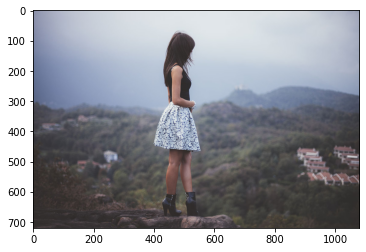

1/1 [==============================] - 0s 248ms/step
모델 출력: 1.0
/content/hh_image_1.jpg는 사람입니다.
--------------------


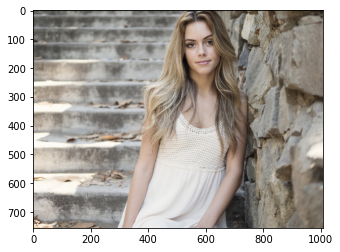

1/1 [==============================] - 0s 16ms/step
모델 출력: 0.0
/content/hh_image_2.jpg는 말입니다.
--------------------


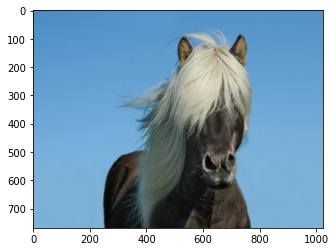

1/1 [==============================] - 0s 18ms/step
모델 출력: 1.0
/content/hh_image_3.jpg는 사람입니다.
--------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(300, 300))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    print('모델 출력:', classes[0][0])
    if classes[0][0] > 0.5:
        print(fn + "는 사람입니다.")
    else:
        print(fn + "는 말입니다.")
    print('--------------------')

# Image Augmentation (이미지 증식)

이미지에 여러 변환을 적용해 새로운 데이터를 추가로 만드는 기법

In [ ]:
# 모델 재정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

### ImageDataGenerator 사용

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


### Train

In [ ]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
33/33 [==============================] - 28s 812ms/step - loss: 0.7308 - accuracy: 0.5404 - val_loss: 0.6656 - val_accuracy: 0.6875
Epoch 2/10
33/33 [==============================] - 33s 1s/step - loss: 0.6286 - accuracy: 0.6475 - val_loss: 0.9095 - val_accuracy: 0.5430
Epoch 3/10
33/33 [==============================] - 29s 876ms/step - loss: 0.5755 - accuracy: 0.7118 - val_loss: 1.2290 - val_accuracy: 0.5625
Epoch 4/10
33/33 [==============================] - 30s 907ms/step - loss: 0.4641 - accuracy: 0.7780 - val_loss: 2.6451 - val_accuracy: 0.5039
Epoch 5/10
33/33 [==============================] - 28s 834ms/step - loss: 0.4595 - accuracy: 0.8101 - val_loss: 0.6565 - val_accuracy: 0.6484
Epoch 6/10
33/33 [==============================] - 28s 839ms/step - loss: 0.3419 - accuracy: 0.8617 - val_loss: 0.6846 - val_accuracy: 0.6758
Epoch 7/10
33/33 [==============================] - 27s 806ms/step - loss: 0.3331 - accuracy: 0.8695 - val_loss: 0.2823 - val_accuracy: 0.9141
Ep

### Test

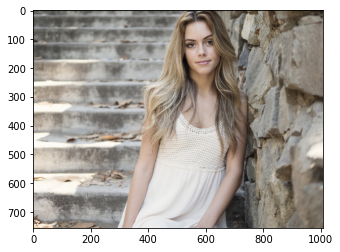

1/1 [==============================] - 0s 79ms/step
모델 출력: 0.0
/content/hh_image_2.jpg는 말입니다.


In [ ]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = tf.keras.utils.load_img(fn, target_size=(300, 300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + "는 사람입니다.")
else:
    print(fn + "는 말입니다.")

### Image_dataset_from_directory 사용

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode='binary'
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(300, 300),
    label_mode='binary'
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


### Train

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.RandomRotation(0.11, fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2, fill_mode='nearest'),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10


33/33 [==============================] - 16s 356ms/step - loss: 0.9644 - accuracy: 0.5677 - val_loss: 0.6295 - val_accuracy: 0.5430
Epoch 2/10
33/33 [==============================] - 12s 331ms/step - loss: 0.6222 - accuracy: 0.7030 - val_loss: 1.0607 - val_accuracy: 0.5000
Epoch 3/10
33/33 [==============================] - 12s 309ms/step - loss: 0.5695 - accuracy: 0.7176 - val_loss: 7.8308 - val_accuracy: 0.5078
Epoch 4/10
33/33 [==============================] - 12s 323ms/step - loss: 0.5412 - accuracy: 0.7897 - val_loss: 3.1084 - val_accuracy: 0.5234
Epoch 5/10
33/33 [==============================] - 11s 306ms/step - loss: 0.3876 - accuracy: 0.8345 - val_loss: 4.3591 - val_accuracy: 0.5195
Epoch 6/10
33/33 [==============================] - 12s 333ms/step - loss: 0.3464 - accuracy: 0.8588 - val_loss: 2.1041 - val_accuracy: 0.6328
Epoch 7/10
33/33 [==============================] - 11s 303ms/step - loss: 0.3342 - accuracy: 0.8724 - val_loss: 4.4599 - val_accuracy: 0.5000
Epoch 8/10

### Test

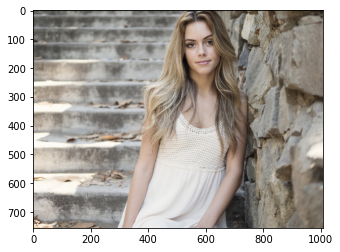

1/1 [==============================] - 0s 82ms/step
모델 출력: 0.92294973
/content/hh_image_2.jpg는 사람입니다.


In [ ]:
fn = sample_images[1]
plt.imshow(mpimg.imread(fn))
plt.show()

# 이미지 불러오기
img = tf.keras.utils.load_img(fn, target_size=(300, 300))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict(x)

print('모델 출력:', classes[0][0])
if classes[0][0] > 0.5:
    print(fn + "는 사람입니다.")
else:
    print(fn + "는 말입니다.")

# Transfer Learning (전이 학습)

아주 큰 데이터셋에서 훈련된 모델의 가중치를 가지고 와서 해결하고자 하는 과제에 맞게 재보정해서 사용하는 것

### Load Weights of Inception V3 model

- Inception V3  

    ImageNet 데이터베이스에 있는 수백만 개 이상의 이미지에서 훈련된 Dataset  
    
    수십 개의 layer & 1000개의 class

In [ ]:
import urllib.request
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(weights_file)

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_30[0][0]']              
 alization)                                                                                       
                                                                                       

In [ ]:
# 다시 훈련하지 않기 위해 전체 신경망 동결
for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('마지막 layer의 출력 크기 : ', last_layer.output_shape)
last_output = last_layer.output

마지막 layer의 출력 크기 :  (None, 7, 7, 768)


### 출력 펼치기

Dense layer에 넣기 위해서 1차원으로 펼침

In [ ]:
x = layers.Flatten()(last_output)
x.shape     # 37632 = 7 * 7 * 768

TensorShape([None, 37632])

### Dense layer

Fully-connected layer : 1024개 뉴런을 가진 hidden layer & ReLU activation 함수를 사용  

Output layer : classfication을 위해 sigmoid 함수를 사용

In [ ]:
x = layers.Dense(1024, activation='relu')(x)    # Fully-connected layer
x = layers.Dense(1, activation='sigmoid')(x)    # Output layer

### Compile model

In [ ]:
model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Train

In [ ]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
52/52 [==============================] - 20s 310ms/step - loss: 0.1679 - acc: 0.9396 - val_loss: 0.0694 - val_acc: 0.9688
Epoch 2/10
52/52 [==============================] - 15s 282ms/step - loss: 0.0347 - acc: 0.9883 - val_loss: 0.0051 - val_acc: 0.9961
Epoch 3/10
52/52 [==============================] - 15s 290ms/step - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0098 - val_acc: 0.9961
Epoch 4/10
52/52 [==============================] - 14s 273ms/step - loss: 0.0368 - acc: 0.9893 - val_loss: 0.2257 - val_acc: 0.9609
Epoch 5/10
52/52 [==============================] - 16s 306ms/step - loss: 0.0168 - acc: 0.9942 - val_loss: 0.0146 - val_acc: 0.9961
Epoch 6/10
52/52 [==============================] - 13s 257ms/step - loss: 0.0153 - acc: 0.9961 - val_loss: 0.1034 - val_acc: 0.9805
Epoch 7/10
52/52 [==============================] - 14s 262ms/step - loss: 0.0089 - acc: 0.9971 - val_loss: 0.0271 - val_acc: 0.9922
Epoch 8/10
52/52 [==============================] - 14s 260ms/step - 

# Multiclass Classification (다중 분류)

이전까지는 두 옵션 중 하나를 선택하는 Binary Classification (이진 분류) model 이였기 때문에 sigmoid 활성화 함수를 사용  

Multiclass Classifiction→ Output layer에 분류하려는 클래스 개수에 해당하는 N개의 뉴런 사용

### Dataset 경로 설정  

https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset

In [ ]:
train_dir = offset_dir + 'rps/train'
validation_dir = offset_dir + 'rps/validation'

/content/drive/MyDrive/Colab Notebooks/ML_DL/rps/train /content/drive/MyDrive/Colab Notebooks/ML_DL/rps/validation


### Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

### Label 할당

두 개 이상의 하위 디렉터리에서 ImageDataGenerator를 사용해야 하므로 `class_mode = 'categorical'`

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 1124 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


### 신경망 정의

활성화 함수 : softmax

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),                          # 밀집 층에 전달하기 위해 펼침
    layers.Dense(512, activation='relu'),      # 512개 뉴런을 가진 은닉층
    layers.Dense(3, activation='softmax')
])

### Compile model

이전에는 loss function을 binary_crossentropy 사용했으나 다중 클래스에서는 categorical_crossentropy를 사용해야함

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train

In [ ]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
36/36 [==============================] - 282s 8s/step - loss: 0.7893 - accuracy: 0.6673
Epoch 2/10
36/36 [==============================] - 10s 287ms/step - loss: 0.6415 - accuracy: 0.7286
Epoch 3/10
36/36 [==============================] - 10s 282ms/step - loss: 0.3943 - accuracy: 0.8176
Epoch 4/10
36/36 [==============================] - 11s 308ms/step - loss: 0.3127 - accuracy: 0.8719
Epoch 5/10
36/36 [==============================] - 10s 281ms/step - loss: 0.2114 - accuracy: 0.9190
Epoch 6/10
36/36 [==============================] - 10s 277ms/step - loss: 0.2042 - accuracy: 0.9244
Epoch 7/10
36/36 [==============================] - 10s 282ms/step - loss: 0.1639 - accuracy: 0.9377
Epoch 8/10
36/36 [==============================] - 10s 279ms/step - loss: 0.0972 - accuracy: 0.9591
Epoch 9/10
36/36 [==============================] - 10s 279ms/step - loss: 0.0881 - accuracy: 0.9689
Epoch 10/10
36/36 [==============================] - 10s 296ms/step - loss: 0.0739 - accuracy

### Test

In [ ]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()
    sample_images = ['/content/' + fn for fn in uploaded.keys()]

    # 업로드된 파일이 없으면 깃허브에서 다운로드합니다.
    if len(uploaded) < 1:
        import gdown
        base_url = 'https://github.com/rickiepark/aiml4coders/raw/main/ch03/'
        for i in range(1,4):
            gdown.download(base_url + 'rsp_image_{}.jpg'.format(i))
        sample_images = ['/content/rsp_image_{}.jpg'.format(i) for i in range(1,4)]

# 로컬 컴퓨터면 ch03 폴더에 있는 이미지를 사용합니다.
else:
    sample_images = ['rsp_image_{}.jpg'.format(i) for i in range(1,4)]

Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/rsp_image_1.jpg
To: /content/rsp_image_1.jpg
100%|██████████| 19.7k/19.7k [00:00<00:00, 7.56MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/rsp_image_2.jpg
To: /content/rsp_image_2.jpg
100%|██████████| 20.7k/20.7k [00:00<00:00, 14.3MB/s]
Downloading...
From: https://github.com/rickiepark/aiml4coders/raw/main/ch03/rsp_image_3.jpg
To: /content/rsp_image_3.jpg
100%|██████████| 21.1k/21.1k [00:00<00:00, 13.6MB/s]


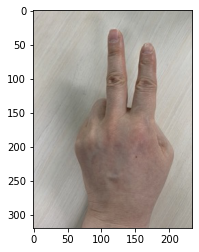

1/1 [==============================] - 0s 200ms/step
/content/rsp_image_1.jpg는 보입니다.


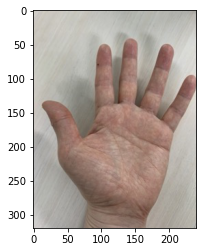

1/1 [==============================] - 0s 16ms/step
/content/rsp_image_2.jpg는 보입니다.


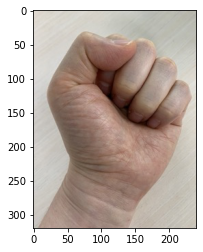

1/1 [==============================] - 0s 17ms/step
/content/rsp_image_3.jpg는 바위입니다.


In [ ]:
rsp_name = ['보', '바위', '가위']

for fn in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()
    
    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(150, 150))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    idx = np.argmax(classes[0])
    print(fn + "는 {}입니다.".format(rsp_name[idx]))

# Dropout Regularization (드롭아웃 규제)

학습할 때 특징의 일부를 날려버림(Dropout)  

→ 데이터가 느슨해져 정확도는 떨어지겠지만 더 많은 데이터를 학습한 효과  

→ Overfitting 감소

### Fashion MNIST classification에 적용

In [ ]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


#### Dropout Regularization 적용 X

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4839 - accuracy: 0.8263 - val_loss: 0.4108 - val_accuracy: 0.8493
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3644 - accuracy: 0.8662 - val_loss: 0.3790 - val_accuracy: 0.8612
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3276 - accuracy: 0.8791 - val_loss: 0.3588 - val_accuracy: 0.8697
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3072 - accuracy: 0.8851 - val_loss: 0.3497 - val_accuracy: 0.8767
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2855 - accuracy: 0.8926 - val_loss: 0.3408 - val_accuracy: 0.8767
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2725 - accuracy: 0.8988 - val_loss: 0.3514 - val_accuracy: 0.8714
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2598 - accuracy: 0.9017 - val_loss: 0.3331 - val_accuracy:

#### Dropout Regularization 적용 O

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=10)

model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5852 - accuracy: 0.7922 - val_loss: 0.4470 - val_accuracy: 0.8390
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4298 - accuracy: 0.8454 - val_loss: 0.3945 - val_accuracy: 0.8576
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3938 - accuracy: 0.8580 - val_loss: 0.3918 - val_accuracy: 0.8565
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3720 - accuracy: 0.8661 - val_loss: 0.3703 - val_accuracy: 0.8659
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3553 - accuracy: 0.8715 - val_loss: 0.3525 - val_accuracy: 0.8735
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3447 - accuracy: 0.8763 - val_loss: 0.3493 - val_accuracy: 0.8745
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3305 - accuracy: 0.8800 - val_loss: 0.3402 - val_accuracy:

[0.33211976289749146, 0.8808000087738037]

accuracy와 val_accuracy 값이 **비슷해짐** → Overfitting 가능성 적음

신경망을 만들 때 Train-set에서 Accuracy가 높다고 항상 옳은 것은 아님 → **Overfitting** 의 신호일 수 있음 → **Dropout** 사용